# Business Understanding

The goal is to save the new home buyers some time and to help ensure consistency in pricing between new houses on the market and old houses.

The main purpose of this algorithm is predictive, meaning that this model should be able to take in attributes of the King's County dataset that does not yet have a set price, and to predict a good price. The effectiveness of this predictive model will be measured by how well it predicts prices in our test set, where we know what the actual prices were but the model does not.

The secondary purpose of this algorithm is inferential, meaning that the model should be able to tell us something about the relationship between the attributes of a house in King's County and its price. 

### Analysis Questions

This analysis will seek to answer three questions about the data:

**Question 1:** Which features are most highly correlated with price?

**Question 2:** Which features have the strongest correlations with other predictor variables?

**Question 3:** What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Handling Missing Values

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
print(df['waterfront'].isnull().count())
print(df['waterfront'].nunique())
print(df['waterfront'].unique())
print(df['waterfront'].value_counts())

21597
2
[nan 'NO' 'YES']
NO     19075
YES      146
Name: waterfront, dtype: int64


In [8]:
print(df['view'].nunique())
print(df['view'].unique())
print(df['view'].value_counts())

5
['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [9]:
print(df['yr_renovated'].nunique())
print(df['yr_renovated'].unique())

70
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [10]:
print(df['floors'].nunique())
print(df['floors'].unique())
print(df['floors'].value_counts())

6
[1.  2.  1.5 3.  2.5 3.5]
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64


In [11]:
df['yr_renovated'].fillna(0,inplace=True)

In [12]:
df['view'].fillna('NONE', inplace=True)

In [13]:
df['waterfront'].fillna('NO', inplace=True)

0.0 yr_renovated is not actually information that is missing from our dataset, it is a genuine category which means the house has never been renovated. This interpretation aligns with what we see in data/column_names.txt. So, let's replace those NaNs with the string "N/A" to indicate that this is a real category, not missing data:

In [14]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df['date'] = pd.to_datetime(df['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [16]:
df["month"] = df["date"].dt.month

In [17]:
 def getSeason(month):
    if (month > 11 or month <= 2):
       return "Winter"
    elif (month >= 3 and month <= 5):
       return "Spring"
    elif (month >=6 and month <= 8):
       return "Summer"
    else:
       return "Fall"

In [18]:
df["season"] = df["month"].apply(getSeason)

In [19]:
print(df['season'].value_counts())

Spring    6518
Summer    6328
Fall      5056
Winter    3695
Name: season, dtype: int64


In [20]:
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

In [21]:
df.sqft_basement = df.sqft_basement.astype('float')

In [22]:
df.floors = df.floors.astype('object')

In [23]:
df.sqft_basement = df.sqft_basement.astype(np.dtype('int64')) #converts column from float to int64, in line with the other similar columns

In [24]:
df.yr_renovated = df.yr_renovated.astype(np.dtype('int64'))

It's advisable to remove the `id` column as keeping it in won't lead to meaningful results.

In [25]:
df.drop(["id"],axis=1, inplace=True)

In [26]:
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1,NO,NONE,Average,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,Fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2,NO,NONE,Average,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,Winter
2,2015-02-25,180000.0,2,1.00,770,10000,1,NO,NONE,Average,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,Winter
3,2014-12-09,604000.0,4,3.00,1960,5000,1,NO,NONE,Very Good,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,Winter
4,2015-02-18,510000.0,3,2.00,1680,8080,1,NO,NONE,Average,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,Winter
5,2014-05-12,1230000.0,4,4.50,5420,101930,1,NO,NONE,Average,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,5,Spring
6,2014-06-27,257500.0,3,2.25,1715,6819,2,NO,NONE,Average,...,0,1995,0,98003,47.3097,-122.327,2238,6819,6,Summer
7,2015-01-15,291850.0,3,1.50,1060,9711,1,NO,NONE,Average,...,0,1963,0,98198,47.4095,-122.315,1650,9711,1,Winter
8,2015-04-15,229500.0,3,1.00,1780,7470,1,NO,NONE,Average,...,730,1960,0,98146,47.5123,-122.337,1780,8113,4,Spring
9,2015-03-12,323000.0,3,2.50,1890,6560,2,NO,NONE,Average,...,0,2003,0,98038,47.3684,-122.031,2390,7570,3,Spring


In [27]:
categorical_cols = list(df.select_dtypes('object').columns)
categorical_cols

['floors', 'waterfront', 'view', 'condition', 'grade', 'season']

In [28]:
df[categorical_cols].nunique()

floors         6
waterfront     2
view           5
condition      5
grade         11
season         4
dtype: int64

In [29]:
cont_cols = list(df.select_dtypes('number').columns)
cont_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month']

In [30]:
df[cont_cols].nunique()

price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
sqft_above        942
sqft_basement     303
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
month              12
dtype: int64

## Feature Scaling and Normalization

In [31]:
continuous = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 #'sqft_basement',
 'yr_built',
 #'yr_renovated',
 'zipcode',
 'lat',
 #'long',
 'sqft_living15',
 'sqft_lot15',
 'month'
]

In [32]:
#log features
king_cont = df[continuous]
log_names = [f'{column}_log' for column in king_cont.columns]
king_log = np.log(king_cont)
king_log.columns = log_names
#king_log.hist(figsize=(20, 20), bins='auto')
#fig.tight_layout();


In [33]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

king_log_norm = king_log.apply(normalize)

#king_log_norm.hist(figsize  = [8, 8]);

In [34]:
# one hot encode categoricals
king_ohe = pd.get_dummies(df[categorical_cols], prefix=categorical_cols, drop_first=True)


In [35]:
preprocessed = pd.concat([king_log_norm, king_ohe], axis=1)

### Perform Stepwise Selection

In [36]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [37]:
X1 = preprocessed.drop('price_log', axis=1)
y1 = preprocessed['price_log']

result = stepwise_selection(X1, y1, verbose = True)
print('resulting features:')
print(result)

Add  sqft_living_log                with p-value 0.0
Add  lat_log                        with p-value 0.0
Add  view_NONE                      with p-value 0.0
Add  sqft_living15_log              with p-value 2.32388e-225
Add  yr_built_log                   with p-value 7.13709e-114
Add  grade_7 Average                with p-value 8.79744e-132
Add  grade_6 Low Average            with p-value 1.8661e-178
Add  grade_8 Good                   with p-value 2.23929e-229
Add  grade_5 Fair                   with p-value 1.36277e-235
Add  grade_9 Better                 with p-value 5.43668e-149
Add  waterfront_YES                 with p-value 7.67405e-120
Add  bathrooms_log                  with p-value 5.02929e-78
Add  grade_4 Low                    with p-value 6.37192e-70
Add  sqft_lot15_log                 with p-value 4.11898e-40
Add  zipcode_log                    with p-value 5.07549e-50
Add  grade_12 Luxury                with p-value 3.47156e-36
Add  condition_Very Good            with 

In [38]:
X_fin = X1[result]
X_with_intercept = sm.add_constant(X_fin)
model2 = sm.OLS(y1,X_with_intercept).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2318.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:45:06   Log-Likelihood:                -14548.
No. Observations:               21597   AIC:                         2.916e+04
Df Residuals:                   21564   BIC:                         2.943e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.8799      0.023     37.781      0.000       0.834       0.926
sqft_living_log         0.2922      0.008     38.144      0.000       0.277       0.307
lat_log                 0.3603      0.004    101.860      0.000       0.353       0.367
view_NONE              -0.2462      0.016    -15.193      0.000      -0.278      -0.214
sqft_living15_log       0.1199      0.005     21.801      0.000       0.109       0.131
yr_built_log           -0.2142      0.005    -41.823      0.000      -0.224      -0.204
grade_7 Average        -1.0109      0.019    -53.567      0.000      -1.048      -0.974
grade_6 Low Average    -1.2770      0.024    -53.545      0.000      -1.324      -1.230
grade_8 Good           -0.7083      0.017    -41.703      0.000      -0.742      -0.675
grade_5 Fair           -1.5289      0.038    -39.787      0.000      -1.604      -1.454
grade_9 Better         -0.3228      0.017    -18.801      0.000      -0.356      -0.289
waterfront_YES          0.8064      0.048     16.721      0.000       0.712       0.901
bathrooms_log           0.0823      0.006     13.872      0.000       0.071       0.094
grade_4 Low            -1.5926      0.095    -16.743      0.000      -1.779      -1.406
sqft_lot15_log         -0.0724      0.008     -8.687      0.000      -0.089      -0.056
zipcode_log            -0.0556      0.004    -14.499      0.000      -0.063      -0.048
grade_12 Luxury         0.7481      0.053     14.156      0.000       0.644       0.852
condition_Very Good     0.2155      0.013     16.497      0.000       0.190       0.241
season_Spring           0.0913      0.007     12.945      0.000       0.077       0.105
bedrooms_log           -0.0510      0.004    -11.410      0.000      -0.060      -0.042
grade_11 Excellent      0.3254      0.028     11.684      0.000       0.271       0.380
condition_Good          0.0959      0.008     11.699      0.000       0.080       0.112
grade_13 Mansion        1.3622      0.133     10.224      0.000       1.101       1.623
view_EXCELLENT          0.2773      0.036      7.695      0.000       0.207       0.348
floors_3.0              0.2089      0.023      9.116      0.000       0.164       0.254
condition_Fair         -0.2067      0.037     -5.567      0.000      -0.279      -0.134
floors_2.0              0.0867      0.010      9.099      0.000       0.068       0.105
floors_1.5              0.0857      0.013      6.797      0.000       0.061       0.110
floors_2.5              0.2297      0.039      5.949      0.000       0.154       0.305
condition_Poor         -0.4064      0.089     -4.559      0.000      -0.581      -0.232
view_GOOD               0.1342      0.026      5.132      0.000       0.083       0.186
view_FAIR               0.1008      0.030      3.319      0.001       0.041       0.160
sqf

Trying a model after splitting data of preprocessed dataframe:

In [39]:
# Create X,Y for splitting the data into train and test
X_preprocessed = preprocessed.drop(['price_log'], axis=1)
y_preprocessed = preprocessed[["price_log"]]

**Perform a train-test split**

In [40]:
# Splitting the preprocessed df into train and test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.8, random_state=9)

Apply your model to the train set and showing its summary:


In [41]:
# Create a model with the training data
x_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train_with_intercept)
results = model.fit()

# show the model summary for the training data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     410.4
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:45:06   Log-Likelihood:                -2913.5
No. Observations:                4319   AIC:                             5903.
Df Residuals:                    4281   BIC:                             6145.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9031      0.055     16.468      0.000       0.796       1.011
bedrooms_log           -0.0770      0.010     -7.628      0.000      -0.097      -0.057
bathrooms_log           0.0792      0.014      5.823      0.000       0.053       0.106
sqft_living_log         0.3232      0.021     15.422      0.000       0.282       0.364
sqft_lot_log            0.0497      0.019      2.626      0.009       0.013       0.087
sqft_above_log         -0.0038      0.020     -0.194      0.846      -0.042       0.035
yr_built_log           -0.2032      0.012    -17.520      0.000      -0.226      -0.180
zipcode_log            -0.0518      0.009     -5.981      0.000      -0.069      -0.035
lat_log                 0.3624      0.008     45.792      0.000       0.347       0.378
sqft_living15_log       0.1317      0.013     10.503      0.000       0.107       0.156
sqft_lot15_log         -0.1087      0.019     -5.770      0.000      -0.146      -0.072
month_log              -0.0051      0.010     -0.522      0.602      -0.024       0.014
floors_1.5              0.0885      0.029      3.005      0.003       0.031       0.146
floors_2.0              0.0598      0.025      2.418      0.016       0.011       0.108
floors_2.5              0.2048      0.102      2.017      0.044       0.006       0.404
floors_3.0              0.1737      0.055      3.185      0.001       0.067       0.281
floors_3.5              0.1152      0.479      0.241      0.810      -0.824       1.054
waterfront_YES          0.7531      0.109      6.915      0.000       0.540       0.967
view_EXCELLENT          0.2605      0.080      3.258      0.001       0.104       0.417
view_FAIR               0.0327      0.070      0.470      0.638      -0.104       0.169
view_GOOD               0.1648      0.057      2.909      0.004       0.054       0.276
view_NONE              -0.2218      0.036     -6.121      0.000      -0.293      -0.151
condition_Fair         -0.2603      0.077     -3.372      0.001      -0.412      -0.109
condition_Good          0.0730      0.018      3.969      0.000       0.037       0.109
condition_Poor         -0.7526      0.277     -2.716      0.007      -1.296      -0.209
condition_Very Good     0.1776      0.030      5.845      0.000       0.118       0.237
grade_11 Excellent      0.2813      0.062      4.527      0.000       0.159       0.403
grade_12 Luxury         0.8520      0.122      6.976      0.000       0.613       1.091
grade_13 Mansion        1.0016      0.220      4.554      0.000       0.570       1.433
grade_3 Poor        -2.301e-16   1.98e-16     -1.164      0.245   -6.18e-16    1.57e-16
grade_4 Low            -1.4386      0.247     -5.833      0.000      -1.922      -0.955
grade_5 Fair           -1.4192      0.088    -16.169      0.000      -1.591      -1.247
gra

**Calculate R_squared for training and test sets:**

In [42]:
# calculating the r_squared for the test data
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print ("R-squared of the train data :", results.rsquared)

print ('R-squared of the test data :', r2_score(y_pred_test, y_test))


R-squared of the train data : 0.780078939666741
R-squared of the test data : 0.706666750947633


Here we calculated the R_squared for both the train and test datasets as the data were splitted into two different sets (train and test) where each has its accuracy and r_squared values

In [43]:
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

Calculate the Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):


In [44]:
# Import mean_squared_error from sklearn.metrics

from sklearn.metrics import mean_squared_error

# Calculate training and test MSE

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Mean Squarred Error: 0.22566484690396732
Test Mean Squarred Error: 0.22823039779348062
Train Root Mean Squarred Error: 0.4750419422576993
Test Root Mean Squarred Error: 0.4777346520752714


Evaluate the effect of train-test split size:

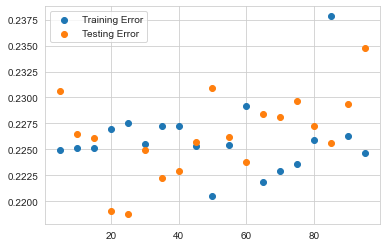

In [45]:
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_fin, y_preprocessed, test_size=t_size/100)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_pred_train))
    test_err.append(mean_squared_error(y_test, y_pred_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

Evaluate the effect of train-test split size: Extension


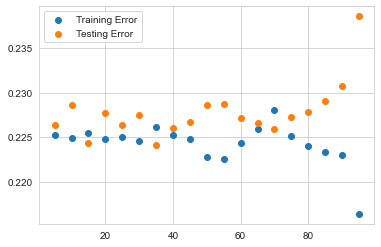

In [46]:
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_fin, y_preprocessed, test_size=t_size/100)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_pred_train))
        temp_test_err.append(mean_squared_error(y_test, y_pred_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

Trying another model after splitting data of preprocessed dataframe after stepwise process :




Perform a train-test split

In [47]:
# Splitting the preprocessed df of X_fin into train and test
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_preprocessed, test_size=0.8, random_state=9)

Apply your model to the train set and showing its summary:

In [48]:
# Create a model with the training data
x_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train_with_intercept)
results = model.fit()

# show the model summary for the training data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     474.6
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:45:21   Log-Likelihood:                -2915.3
No. Observations:                4319   AIC:                             5897.
Df Residuals:                    4286   BIC:                             6107.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9098      0.052     17.360      0.000       0.807       1.013
sqft_living_log         0.3207      0.017     18.675      0.000       0.287       0.354
lat_log                 0.3623      0.008     45.971      0.000       0.347       0.378
view_NONE              -0.2228      0.036     -6.161      0.000      -0.294      -0.152
sqft_living15_log       0.1315      0.012     10.528      0.000       0.107       0.156
yr_built_log           -0.2031      0.012    -17.583      0.000      -0.226      -0.180
grade_7 Average        -1.0356      0.043    -24.262      0.000      -1.119      -0.952
grade_6 Low Average    -1.3259      0.054    -24.748      0.000      -1.431      -1.221
grade_8 Good           -0.7387      0.039    -19.180      0.000      -0.814      -0.663
grade_5 Fair           -1.4203      0.087    -16.254      0.000      -1.592      -1.249
grade_9 Better         -0.4271      0.039    -10.878      0.000      -0.504      -0.350
waterfront_YES          0.7486      0.109      6.884      0.000       0.535       0.962
bathrooms_log           0.0792      0.014      5.862      0.000       0.053       0.106
grade_4 Low            -1.4423      0.246     -5.855      0.000      -1.925      -0.959
sqft_lot15_log         -0.1098      0.019     -5.837      0.000      -0.147      -0.073
zipcode_log            -0.0516      0.009     -5.993      0.000      -0.068      -0.035
grade_12 Luxury         0.8550      0.122      7.010      0.000       0.616       1.094
condition_Very Good     0.1762      0.030      5.816      0.000       0.117       0.236
season_Spring           0.1075      0.016      6.757      0.000       0.076       0.139
bedrooms_log           -0.0766      0.010     -7.594      0.000      -0.096      -0.057
grade_11 Excellent      0.2813      0.062      4.535      0.000       0.160       0.403
condition_Good          0.0728      0.018      3.970      0.000       0.037       0.109
grade_13 Mansion        0.9936      0.220      4.523      0.000       0.563       1.424
view_EXCELLENT          0.2614      0.080      3.275      0.001       0.105       0.418
floors_3.0              0.1725      0.053      3.271      0.001       0.069       0.276
condition_Fair         -0.2599      0.077     -3.368      0.001      -0.411      -0.109
floors_2.0              0.0573      0.021      2.672      0.008       0.015       0.099
floors_1.5              0.0866      0.028      3.066      0.002       0.031       0.142
floors_2.5              0.2001      0.100      1.995      0.046       0.003       0.397
condition_Poor         -0.7565      0.277     -2.731      0.006      -1.300      -0.213
view_GOOD               0.1652      0.057      2.916      0.004       0.054       0.276
view_FAIR               0.0336      0.070      0.483      0.629      -0.103       0.170
sqf

Calculate R_squared for training and test sets:

In [49]:
# calculating the r_squared for the test data
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print ("R-squared of the train data :", results.rsquared)

print ('R-squared of the test data :', r2_score(y_pred_test, y_test))


R-squared of the train data : 0.7798963502324714
R-squared of the test data : 0.7070810098940452


Calculate training and test residuals:

In [50]:
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

Calculate the Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):


In [51]:
# Import mean_squared_error from sklearn.metrics

from sklearn.metrics import mean_squared_error

# Calculate training and test MSE

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Mean Squarred Error: 0.22585220511635634
Test Mean Squarred Error: 0.22803319213536202
Train Root Mean Squarred Error: 0.47523910310111933
Test Root Mean Squarred Error: 0.4775282108267134


Evaluate the effect of train-test split size:

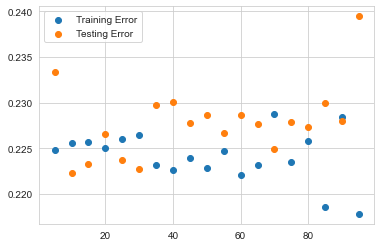

In [52]:
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_fin, y_preprocessed, test_size=t_size/100)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_pred_train))
    test_err.append(mean_squared_error(y_test, y_pred_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

Evaluate the effect of train-test split size: Extension


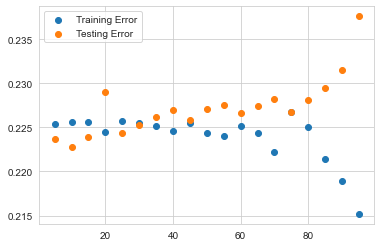

In [53]:
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_fin, y_preprocessed, test_size=t_size/100)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_pred_train))
        temp_test_err.append(mean_squared_error(y_test, y_pred_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()